# Work Sheet 1

### Exercise 1 - Multinomial distributed random numbers

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("anthrokids.csv")
df.head()

,id,mass,height,waist,foot,sittingHeight,upperLegLength,kneeHeight,forearmLength,age,gender,handedness,birthOrder
0,1,15.5,103.3,47.5,16.3,582.0,306.0,NaN,259.0,4.219,F,right,1.0
1,2,17.6,103.9,49.8,16.3,606.0,311.0,NaN,274.0,4.326,M,right,1.0
2,3,23.0,111.2,52.0,17.1,594.0,387.0,NaN,304.0,4.476,F,right,1.0
3,4,16.5,99.7,49.1,16.3,542.0,312.0,NaN,281.0,3.841,F,both,1.0
4,5,15.0,99.7,46.5,16.7,524.0,321.0,NaN,269.0,3.460,F,both,1.0


In [ ]:
# Marius
# a) Create multinomial distribution
df = df[df['age'].notna()] # only 2 rows
# Create new column with ages rounded to integers
df["age_int"] = df["age"].round(0).astype(int)

# Get total number of people, used for calculating percentages of ages
num_people = df.shape[0]
print("total number of people:", num_people)

# Create list of count of ages mapped to age
people_per_age = df["age_int"].value_counts().sort_index()
print(people_per_age)
print()

df_ages = pd.DataFrame()
df_ages["age"] = people_per_age.index
df_ages["count"] = people_per_age.values
df_ages["prob"] = people_per_age.values / num_people
print(df_ages)
print()

multinomial_dist = []
for row in df_ages.iterrows():
  row_values = row[1]
  age_count = row_values["count"].astype(int)
  for i in range(age_count):
    multinomial_dist.append(row_values["age"])
print("Length of the list, matches the number of people:", len(multinomial_dist))
print()

# b) sample from multinomial distribution
seed = 0
def rand():
  # after numerical recipes
  global seed
  a = 1664525
  b = 1013904223
  m = 2**32
  z = (a * seed + b) % m
  seed = z # important: set seed to new random number
  return z

def sample_from(multinomial_dist):
  index = rand() % len(multinomial_dist)
  return multinomial_dist[index]

print("one random sample from the multinomial distribution:", sample_from(multinomial_dist))


# c) check if probability for the ages match
counter_for_11 = 0
counter_for_5 = 0
counter_for_20 = 0
size = 1000000
for i in range(size):
  random_number = sample_from(multinomial_dist)
  if random_number == 11:
    counter_for_11 += 1
  if random_number == 5:
    counter_for_5 += 1
  if random_number == 20:
    counter_for_20 += 1

print("Probability for age 11 (should be about 0.072345):", counter_for_11 / size)
print("Probability for age 5 (should be about 0.069523):", counter_for_5 / size)
print("Probability for age 20 (should be about 0.000257):", counter_for_20 / size)



total number of people: 3898
2      56
3     157
4     228
5     271
6     245
7     231
8     198
9     257
10    258
11    282
12    287
13    315
14    271
15    264
16    198
17    221
18    139
19     19
20      1
Name: age_int, dtype: int64

    age  count      prob
0     2     56  0.014366
1     3    157  0.040277
2     4    228  0.058492
3     5    271  0.069523
4     6    245  0.062853
5     7    231  0.059261
6     8    198  0.050795
7     9    257  0.065931
8    10    258  0.066188
9    11    282  0.072345
10   12    287  0.073628
11   13    315  0.080811
12   14    271  0.069523
13   15    264  0.067727
14   16    198  0.050795
15   17    221  0.056696
16   18    139  0.035659
17   19     19  0.004874
18   20      1  0.000257

Length of the list, matches the number of people: 3898

one random sample from the multinomial distribution: 15.0
Probability for age 11 (should be about 0.072345): 0.072373
Probability for age 5 (should be about 0.069523): 0.069766
Probability for ag

### Exercise 2 - Uniformly distributed random numbers

In [ ]:
# a) Implement a way to generate uniformly distributed one-dimensional random numbers. Make sure that your implementation can be parametrized.
# Uniform Random number generation

d, c, m = 1664525, 1013904223, 2 ** 32
seed = 0
def rand():
  global seed
  # Create 2 indepented uniformly distributed number between 0.0 and 1.0
  # From numerical recipes
  a = 1664525
  b = 1013904223
  m = 2**32
  Z = (a * seed + b) % m
  seed = Z # important: override the global seed
  return Z / m # important: to get a float value between 0 and 1


def GenerateRandomNumberFollowingDistribution(lower_bound, upper_bound):
  r = rand()
  # Random number to be between the lower and upper bound
  return lower_bound + (upper_bound - lower_bound) * r

def GenerateMultipleRandomNumber(size, lower_bound = 1, upper_bound = 20):
  list = []
  for i in range(size):
    r = GenerateRandomNumberFollowingDistribution(lower_bound, upper_bound)
    list.append(r)
  return list

l = GenerateMultipleRandomNumber(10)
print (l)




[5.485291484044865, 6.2927712625823915, 16.57114143925719, 13.689471057616174, 8.29747004644014, 12.814342257101089, 7.530792673816904, 13.160676566883922, 10.647783943684772, 12.054153378587216]


In [ ]:
# b) Use the random number generator from 2 a) to create a sample set of random numbers.
# Estimate the parameters of the underlying uniform distribution from this sample set. What do you observe?
# How accurate is your parameter estimate? What happens if the size of the sample set changes?

a, b= 0 , 1 # a is the lower bound of the distribution and b is the upper bound of the distribution.

# function to find the minimum value in the sample list to compare it to the lower bound a.
def find_min_value(lst):
    min_value = lst[0]  # initialize the minimum value as the first element in the list
    for i in range(1, len(lst)):
        if lst[i] < min_value:
            min_value = lst[i]  # update the minimum value if a smaller value is found
    return min_value

# function to find the maximum value in the sample list to compare it to the upper bound b.
def find_max_value(lst):
    max_value = lst[0]  # initialize the maximum value as the first element in the list
    for i in range(1, len(lst)):
        if lst[i] > max_value:
            max_value = lst[i]  # update the maximum value if a larger value is found
    return max_value

# Generate sample sets of different sizes
for size in [10, 100, 1000, 10000]:
    # Uniformly distributed sample using random numbers
    lower_bound = 10
    upper_bound = 40
    l = GenerateMultipleRandomNumber(size, lower_bound, upper_bound)

    # Estimate parameters of underlying uniform distribution
    a_est = find_min_value(l)
    b_est = find_max_value(l)

    #accuracy and errors of parameter estimate
    errora= abs(a_est - lower_bound)
    errorb= abs(b_est - upper_bound)

    # Print estimated parameters
    print("Sample size: ", size)
    print("Estimated lower bound a: ", a_est)
    print("Estimated upper bound b: ", b_est)
    print("Error in lower bound a: ", errora)
    print("Error in upper bound b: ", errorb)
    print('larger sample sizes increases the accuracy of the lower bound and upper bound.')
    print()

Sample size:  10
Estimated lower bound a:  10.637184532824904
Estimated upper bound b:  39.15744852973148
Error in lower bound a:  0.6371845328249037
Error in upper bound b:  0.8425514702685177
larger sample sizes increases the accuracy of the lower bound and upper bound.

Sample size:  100
Estimated lower bound a:  10.53133153822273
Estimated upper bound b:  39.85325447982177
Error in lower bound a:  0.5313315382227302
Error in upper bound b:  0.14674552017822862
larger sample sizes increases the accuracy of the lower bound and upper bound.

Sample size:  1000
Estimated lower bound a:  10.052023399621248
Estimated upper bound b:  39.95686806039885
Error in lower bound a:  0.052023399621248245
Error in upper bound b:  0.043131939601153135
larger sample sizes increases the accuracy of the lower bound and upper bound.

Sample size:  10000
Estimated lower bound a:  10.002181502059102
Estimated upper bound b:  39.998213215731084
Error in lower bound a:  0.0021815020591020584
Error in upper

Since most of the data points fall close to a straight line, then the sample follow a uniform distribution.


(array([4892., 4915., 4994., 4968., 5067., 4928., 5222., 5000., 4988.,
        5026.]),
 array([ -9.99786409,   1.50118802,  13.00024013,  24.49929225,
         35.99834436,  47.49739647,  58.99644858,  70.49550069,
         81.9945528 ,  93.49360492, 104.99265703]),
 <BarContainer object of 10 artists>)

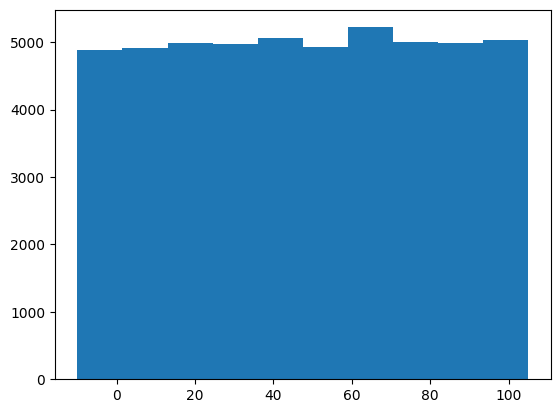

In [ ]:
from matplotlib import pyplot as plt
# c)How can you check if your random numbers really follow the distribution from 2 a)?

# Uniformly distributed sample using random numbers
lower_bound = -10
upper_bound = 105
l = GenerateMultipleRandomNumber(50000, lower_bound, upper_bound)

#print the answer
print('Since most of the data points fall close to a straight line, then the sample follow a uniform distribution.')

import numpy as np
import statsmodels.api as sm

# Plot Histogram for checking if the probabilites for the values are the same
plt.hist(l)

# For checking using Quantile-quantile (QQ) plot
#array = np.array(l)
#sm.qqplot(array, line='s')
#plt.show()


### Exercise 3 - Normally distributed random numbers


a) Implement a way to generate normally distributed one-dimensional random numbers with mean 0 and standard deviation of 1.0.

len(list): 1000
Estimated mean: 0.007333137094563865
Estimated standard deviation: 0.9925519720548427
Error of the mean:  0.007333137094563865
Error of the standard deviation :  0.0074480279451573095
Accuracy of the mean:  99.26668629054362 %
Accuracy of the standard deviation:  99.25519720548427 %
larger sample sizes increases the accuracy of the mean and standard deviation.

len(list): 10000
Estimated mean: -0.012428507244248252
Estimated standard deviation: 1.041069706862387
Error of the mean:  0.012428507244248252
Error of the standard deviation :  0.04106970686238709
Accuracy of the mean:  98.75714927557517 %
Accuracy of the standard deviation:  95.89302931376129 %
larger sample sizes increases the accuracy of the mean and standard deviation.

len(list): 1000000
Estimated mean: 3.571570946414057e-05
Estimated standard deviation: 1.0001945863038153
Error of the mean:  3.571570946414057e-05
Error of the standard deviation :  0.00019458630381530284
Accuracy of the mean:  99.996428429

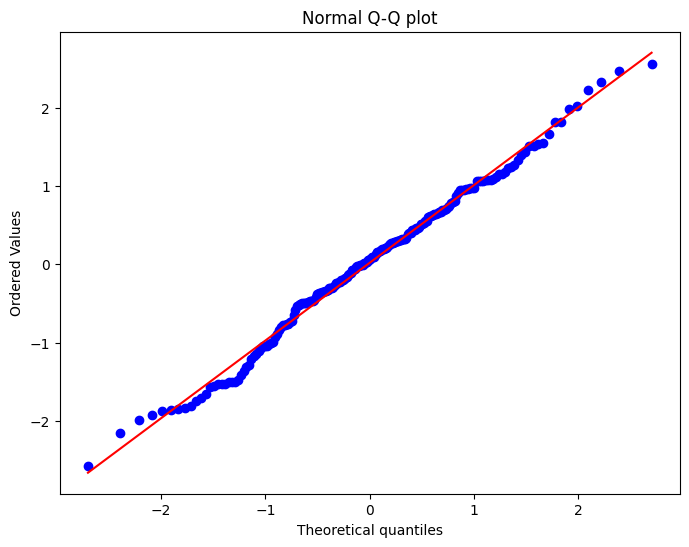

In [ ]:
# Marius
# Create sample list with random numbers following the normal distribution
import numpy as np

seed = 2**25
seed2 = 2001

# unused
"""
def rand_standard_distribution(mean=0.0, std=1.0):
  x = rand_between_0_1()
  return (1 / (std * np.sqrt(2 * np.pi))) * (np.e ** (-(1/2) * (((x - mean) / std))**2))
def rand_between_0_1_after_standard_dist():
  return rand_standard_distribution(seed)
"""

def rand_between_0_1():
  global seed
  # Create 2 indepented uniformly distributed number between 0.0 and 1.0
  # From numerical recipes
  a = 1664525
  b = 1013904223
  m = 2**32
  Z = (a * seed + b) % m
  seed = Z # important: override the global seed
  return Z / m # important: to get a float value between 0 and 1

def rand_between_0_1_seed2():
  global seed2
  # Create 2 indepented uniformly distributed number between 0.0 and 1.0
  # From numerical recipes
  a = 1664525
  b = 1013904223
  m = 2**32
  Z = (a * seed2 + b) % m
  seed2 = Z # important: override the global seed2
  return Z / m # important: to get a float value between 0 and 1

def box_mueller_method():
  # Indepent u
  u1 = rand_between_0_1()
  u2 = rand_between_0_1_seed2()
  # get random numbers following the normal distribution
  z1 = np.cos(2* np.pi * u1) * np.sqrt(-2 * np.log(u2)) # mostly positive values
  z2 = np.sin(2* np.pi * u1) * np.sqrt(-2 * np.log(u2))  # mostly negative values
  return z1, z2

def create_normal_dist_sample_set(size=5):
  sample_list = []
  for i in range(size):
    z1, z2 = box_mueller_method()
    sample_list.append(z1)
    sample_list.append(z2)
  return sample_list


# b) Estimate the parameters
for size in [500, 5000, 500000]: # 2* this size, because always z1 and z2 get added
  sample_list_random_numbers = create_normal_dist_sample_set(size)
  #estimate_normal_params( sample_list_random_numbers)


  list_length = len(sample_list_random_numbers)
  print("len(list):", list_length)
  mean = 0.0
  for value in sample_list_random_numbers:
    mean = mean + value
    mean_est = mean / list_length
  #print("Estimated Mean (should be ):", mean_est)

  std = 0.0
  for value in sample_list_random_numbers:
    std = std + (value - mean_est)**2
  std_est = std / list_length
  #print("Estimated STD (sould be 1):", std)
  #print()



  #accuracy and error of parameter estimate
  error_mean= abs(mean_est-0)
  error_std= abs(std_est-1)
  accuracy_mean = (1 - error_mean) * 100
  accuracy_std= (1 - error_std) * 100

  # Print the estimated parameters
  print(f"Estimated mean: {mean_est}")
  print(f"Estimated standard deviation: {std_est}")
  print("Error of the mean: ", error_mean)
  print("Error of the standard deviation : ", error_std)
  print("Accuracy of the mean: ", accuracy_mean, "%")
  print("Accuracy of the standard deviation: ", accuracy_std, "%")
  print('larger sample sizes increases the accuracy of the mean and standard deviation.')
  print()

#c)
# Normally distributed sample using random numbers

size = 100 #size :The number of random numbers to generate (default is 1) and it is integer.

# Normally distributed sample using random numbers
sample= create_normal_dist_sample_set(size)

#print the answer
print('Since most of the data points fall close to a straight line, then the sample follow a normal distribution.')
import scipy.stats as stats
import matplotlib.pyplot as plt
# Create a Q-Q plot to check if the random numbers follow a normal distribution
fig, ax = plt.subplots(figsize=(8,6))
stats.probplot(sample, dist="norm", plot=ax)
ax.set_title("Normal Q-Q plot")
plt.show()

# Anwer to question c)
print()

b) Use the random number generator from 3 a) to create a sample set of random numbers. Estimate the parameters of the underlying normal distribution from this sample set. What do you observe? How accurate is your parameter estimate? What happens if the size of the sample set changes?

c) How can you check if your random numbers really follow the distribution from 3 a)?

### We could integrate over the distribution, which should equal to 1. We could also integrate over the mean - and + the standard deviation, which should return around 68%, and so on.

### Exercise 4 - Exponentially distributed random numbers

Todo:
- Create a function to that generates a random number for the exponential distribution
  - Similiar to Exercise 3, only difference: it is calculated with the inverse function and not with the box-mueller method
- Estimate parameters from the sample set
- for c) Plot histogram

In [ ]:
import numpy as np

seed = 0
def rand():
  # after numerical recipes
  global seed
  a = 1664525
  b = 1013904223
  m = 2**32
  z = (a * seed + b) % m
  seed = z # important: set seed to new random number
  return z / m

def inverse_exponential_distribution(scale_parameter, u):
  return -(1 / scale_parameter) * np.log(u)

def sample_from_exponential_distribiution(scale_parameter, size):
  sample_set = []
  for i in range(size):
    random_number = rand()
    sample_set.append(inverse_exponential_distribution(scale_parameter, random_number))
  return sample_set

#def exponential_random_variable(scale_parameter=1, size=1):
#    return np.random.exponential(scale=scale_parameter, size=size)

In [ ]:
# Function to estimate the rate of the exponential distribution.
def estimate_parameters(sample):
    n = len(sample)
    sum_x = sum(sample)
    lambda_param = n / sum_x
    return lambda_param

for size in [10, 100, 1000, 10000]:
  # Generate a sample set of random numbers
  scale_parameter = 0.5
  sample = sample_from_exponential_distribiution(scale_parameter, size)

  # Estimate the lambda parameter or rate
  lambda_param = estimate_parameters(sample)

  #accuracy and error of parameter estimate
  error_rate= abs(lambda_param - scale_parameter)
  accuracy_rate = (1 - error_rate) * 100

  # Print the estimated parameters
  print("Estimated rate: {lambda_param}")
  print("Error of the rate: ", error_rate)
  print("Accuracy of the rate: ", accuracy_rate, "%")
  print('larger sample sizes increases the accuracy of the rate parameter increases.')
  print()

Estimated rate: {lambda_param}
Error of the rate:  0.14995125001672366
Accuracy of the rate:  85.00487499832762 %
larger sample sizes increases the accuracy of the rate parameter increases.

Estimated rate: {lambda_param}
Error of the rate:  0.020705516425340464
Accuracy of the rate:  97.92944835746596 %
larger sample sizes increases the accuracy of the rate parameter increases.

Estimated rate: {lambda_param}
Error of the rate:  0.014485554621842867
Accuracy of the rate:  98.55144453781571 %
larger sample sizes increases the accuracy of the rate parameter increases.

Estimated rate: {lambda_param}
Error of the rate:  0.008922865099663668
Accuracy of the rate:  99.10771349003363 %
larger sample sizes increases the accuracy of the rate parameter increases.



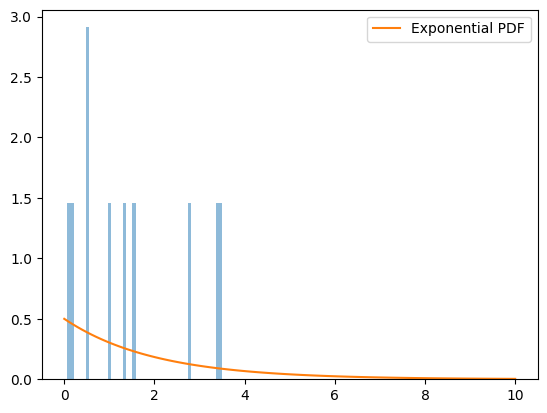

In [ ]:
import matplotlib.pyplot as plt

# Generate a sample set of 1000 exponentially distributed random numbers
scale_parameter = 0.5
sample = sample_from_exponential_distribiution(scale_parameter, size = 10)

from scipy.stats import expon
# Plot the sample histogram and the fitted distribution
x = np.linspace(0, 10, 100)
plt.hist(sample, bins=50, density=True, alpha=0.5)
plt.plot(x, expon.pdf(x, scale=1/scale_parameter), label='Exponential PDF')
plt.legend()

